# Task 1: Acquire, Preprocess, and Analyze the Data


## DataSet Analysis - Adult Census Quality DataSet

Link:https://archive.ics.uci.edu/ml/datasets/Adult

In [2]:
# Importing necessary libraries

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder
import math

# Load the Adult Census Dataset
URL = "https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data"

# Open dataset using pandas and convert to numpy array
df = pd.read_csv(URL, delimiter=",", header=None)
df.columns = ["age", "workclass", "fnlwgt", "education", "education-num","marital-status","occupation","relationship","race","sex","capital-gain","capital-loss","hours-per-week","native-country","income"]

# Remove any rows that have a ? or Nan(missing data) anywhere
df = df[~df.apply(lambda x: x.str.contains('\?'), axis=1).any(1)]
df.dropna(how ='any')

# Remove columns (i.e. features) that have majority 0s
del df["capital-gain"]
del df["capital-loss"]

# One Hot Encoding 
ohe = OneHotEncoder(categories='auto')

# Create the feature array 
feature_arr = ohe.fit_transform(df[['workclass','education','marital-status','occupation','relationship','race','sex','native-country','income']]).toarray()
#print(feature_arr)

# Print all the new feature names to make sure they are correct 
feature_names = ohe.get_feature_names(['workclass','education','marital-status','occupation','relationship','race','sex','native-country','income'])
#print(feature_names)

# Add the feature names to the columns to check if the encoding is correct
df_ohe = pd.DataFrame(feature_arr,columns = feature_names)

# Have to reset index so that the dataframes are concatonated correctly
df.reset_index(drop=True, inplace=True)
df_ohe.reset_index(drop=True, inplace=True)

# Concat the one hot encoded rows to the original data frame
df_concat = pd.concat( [df, df_ohe], axis=1) 

# Replace/delete the categorical columns with the one hot encoded columns
df_final = df_concat.drop(['workclass','fnlwgt','education','marital-status','occupation','relationship','race','sex','native-country','income','income_ <=50K'],axis = 1)

# Dropping the native countries columns because skewed
df_final = df_final[df_final.columns.drop(list(df_final.filter(regex='native-country')))]

# Dropping the race columns because majority are white 
df_final = df_final[df_final.columns.drop(list(df_final.filter(regex='race_')))]

df_final.head(10)


,age,education-num,hours-per-week,workclass_ Federal-gov,workclass_ Local-gov,workclass_ Private,workclass_ Self-emp-inc,workclass_ Self-emp-not-inc,workclass_ State-gov,workclass_ Without-pay,...,occupation_ Transport-moving,relationship_ Husband,relationship_ Not-in-family,relationship_ Other-relative,relationship_ Own-child,relationship_ Unmarried,relationship_ Wife,sex_ Female,sex_ Male,income_ >50K
0,39,13,40,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,50,13,13,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,38,9,40,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,53,7,40,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,28,13,40,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
5,37,14,40,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
6,49,5,16,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
7,52,9,45,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0
8,31,14,50,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
9,42,13,40,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0


In [3]:
# Make a not one hot encoded dataframe for multinomial naive bayes 

# Importing necessary libraries

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
import math

# Load the Adult Census Dataset
URL = "https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data"

# Open dataset using pandas and convert to numpy array
df = pd.read_csv(URL, delimiter=",", header=None)
df.columns = ["age", "workclass", "fnlwgt", "education", "education-num","marital-status","occupation","relationship","race","sex","capital-gain","capital-loss","hours-per-week","native-country","income"]

# Remove any rows that have a ? or Nan(missing data) anywhere
df = df[~df.apply(lambda x: x.str.contains('\?'), axis=1).any(1)]
df.dropna(how ='any')

# Remove columns (i.e. features) that have majority 0s
del df["capital-gain"]
del df["capital-loss"]

# One Hot Encoding 
ohe = OneHotEncoder(categories='auto')
le = LabelEncoder()

# Create the feature array 
feature_arr = ohe.fit_transform(df[['income']]).toarray()
#print(feature_arr)

# Print all the new feature names to make sure they are correct 
feature_names = ohe.get_feature_names(['income'])
#print(feature_names)

# Add the feature names to the columns to check if the encoding is correct
df_ohe = pd.DataFrame(feature_arr,columns = feature_names)

# Have to reset index so that the dataframes are concatonated correctly
df.reset_index(drop=True, inplace=True)
df_ohe.reset_index(drop=True, inplace=True)

# Concat the one hot encoded rows to the original data frame
df_concat = pd.concat( [df, df_ohe], axis=1) 

df_nb = df_concat.drop(['fnlwgt','race','education-num','native-country','income','income_ <=50K'],axis = 1)

df_nb_encoded = df_nb.apply(le.fit_transform)

df_nb_encoded.head(10)


,age,workclass,education,marital-status,occupation,relationship,sex,hours-per-week,income_ >50K
0,22,5,9,4,0,1,1,39,0
1,33,4,9,2,3,0,1,12,0
2,21,2,11,0,5,1,1,39,0
3,36,2,1,2,5,0,1,39,0
4,11,2,9,2,9,5,0,39,0
5,20,2,12,2,3,5,0,39,0
6,32,2,6,3,7,1,0,15,0
7,35,4,11,2,3,0,1,44,1
8,14,2,12,4,9,1,0,49,1
9,25,2,9,2,3,0,1,39,1


# Task 2 - Implement the Models

### Logistic Regression

In [4]:
class LogisticRegression:

    def __init__(self, intercept = True): 
        #self.num_steps = num_steps
        #self.leaning_rate = learning_rate
        #self.error_rate = error_rate
        self.intercept = intercept

    
    def add_intercept(self, X):
        intercept = np.ones((X.shape[0],1))
        return np.concatenate((intercept,X), axis = 1)
    
    def sigmoid(self, z):
        return 1/(1 + np.exp(-z))
                  
                  
    def cost_function(self, X, y, w): #Cross Entropy Loss Function
        N,D = X.shape
        z = np.dot(X, w)
        
        J = np.mean(y * np.log1p(np.exp(-z)) + (1-y) * np.log1p(np.exp(z)))
        grad = np.dot(X.T,(self.sigmoid(z) - y)) / N
        
        return grad, J
    
                  
    def gradient_descent(self, X, y, num_steps, learning_rate, min_error):
        # Min error is just the early termination requirement (Set up as Small change is objective right now)
        N,D = X.shape
        w = np.zeros(D)
        grad, J_previous = self.cost_function(X, y, w)
        
        for i in range(num_steps):
                grad, J = self.cost_function(X, y, w)
                w = w - (learning_rate * grad)
                
                if np.linalg.norm(grad) < min_error:
                #if np.abs(J - J_previous) < min_error: # Need to determine the best way to determine the early stopping point
                    break
                else:
                    J_previous = J
                  
        print("Number of Iterations = " + str(i))
        print("Minimum Cost (J) = " + str(J))          
        return w, J

    
    def fit(self, X, y, num_steps, learning_rate, min_error): #Logistic regression and Gradient Descent (Input is X and y, outputs weights of model)
        if self.intercept == True:
            X = self.add_intercept(X)
            
        
        #Gradient function
        w, J = self.gradient_descent(X, y, num_steps, learning_rate, min_error)
        
        print("Weights of Model: ", w)
        return w
    
    def predict(self, X, w): #Ouput is the predicted values for y
        if self.intercept == True:
            X = self.add_intercept(X)
        
        y_pred = self.sigmoid(np.dot(X, w))
        y_pred = y_pred.round() #Rounds the value to 1 or 0
        
        #print("y_pred Shape")
        #print(y_pred.shape)
        return y_pred
    
    def evaluate_acc(self, y, y_pred):
        #Accuracy = (TP + TN)/ P + N
        #Error Rate = (FP + FN)/P + N
        #Precision = TP/RP
        #Recall = TP/P
        
        A = (np.mean(y_pred == y))*100
        #print(A)
        
        #Alternatively
        TP, TN, FN, FP = 0,0,0,0
        for i in range(len(y_pred)):
            if (y[i] == y_pred[i]) & (y_pred[i] == 1):
                TP = TP + 1
            if (y[i] != y_pred[i]) & (y_pred[i] == 1):
                FP = FP + 1
            if (y[i] == y_pred[i]) & (y_pred[i] == 0):
                TN = TN + 1
            if (y[i] != y_pred[i]) & (y_pred[i] == 0):
                FN = FN + 1
            
        N = TN + FP
        RP = TP + FP
        P = TP + FN
        
        accuracy = ((TP + TN) / (P + N))*100
        errorRate = ((FP + FN) / (P + N))*100
        precision = (TP / (RP))*100
        recall = (TP / (P))*100

        print("Accuracy: ", accuracy, "%")
        print("Error Rate: ", errorRate, "%")
        print("Precision: ", precision, "%")
        print("Recall: ", recall, "% \n")
        
        return A  

### Multinomial Naive Bayes

In [5]:
import numpy as np
from collections import Counter

class MultinomialNaiveBayes:
    
    def fit(self, x_train, y_train):

        ### Compute Priors
        neg_count = np.count_nonzero(y_train == 0)
        pos_count = np.count_nonzero(y_train == 1)
        total_count = neg_count + pos_count
        neg_prior = neg_count/total_count
        pos_prior = pos_count/total_count

        ### Compute likelihoods
        list_feature_class = []

        # Create a tuple that contains (column/feature #, value, class) and add it to a list
        for (row,col), value in np.ndenumerate(x_train):
            feature_class = (col, value, y_train[row])
            list_feature_class.append(feature_class)

        # Get the counts for each feature-value-class tuple
        dict_counts = Counter(list_feature_class)

        # Convert to data frame to make accessing elements easier 
        df_counts = pd.DataFrame(dict_counts.items())
        df_keys = pd.DataFrame(list(dict_counts))

        # Concat the keys and values into one dataframe
        df = pd.concat([df_keys,df_counts[1]], axis = 1)
        df.columns = [ 'featureNum', 'value', 'class','counts' ]


        # Loop through each row and compute the likelihood and store in another array
        likelihoods = []
        for row in df.itertuples(index=False):
            # row[0] Column #
            # row[1] Value 
            # row[2] Class
            # row[3] Count 

            # If class is 0, divide count by neg class count 
            if row[2] == 0:
                likelihoods.append(row[3]/neg_count)
            # If class is 1, divide count by pos class count 
            elif row[2] == 1:
                likelihoods.append(row[3]/pos_count)

        # Add likelihoods column to dataframe 
        df['likelihoods'] = likelihoods 

        return df, neg_prior, pos_prior
        
    def predict(self, x_test, df_likelihoods, neg_prior, pos_prior):

        df_xtest = pd.DataFrame(x_test)
        df_xtest.head(10)

        neg_likelihoods = []
        pos_likelihoods = []

        for (row,col), value in np.ndenumerate(x_test):

            #### Compute negative posterior prob
            filt1 = df_likelihoods["featureNum"] == col
            filt2 = df_likelihoods["value"] == value
            filt3 = df_likelihoods["class"] == 0

            # Find the row where the filters hold true
            neg_likelihood_row = df_likelihoods.where(filt1 & filt2 & filt3)

            # Select only the likelihood from the row
            neg_likelihood = neg_likelihood_row["likelihoods"]

            # Remove the other NaN values 
            neg_likelihood.dropna(axis=0, inplace=True)

            # If the likelihood value is not empty, then add to the likelihoods array
            if neg_likelihood.values.size > 0:
                neg_likelihoods.append(neg_likelihood.values[0])
            # If the likelihood value is empty, add a 1 to the array --> log(1) = 0
            elif neg_likelihood.values.size == 0:
                neg_likelihoods.append(1)

            #### Compute positive posterior prob
            filt4 = df_likelihoods["class"] == 1

            pos_likelihood_row = df_likelihoods.where(filt1 & filt2 & filt4)
            pos_likelihood = pos_likelihood_row["likelihoods"]
            pos_likelihood.dropna(axis=0, inplace=True)

            # If the likelihood value is not empty, then add to the likelihoods array
            if pos_likelihood.values.size > 0:
                pos_likelihoods.append(pos_likelihood.values[0])
            # If the likelihood value is empty, add a 1 to the array --> log(1) = 0
            elif pos_likelihood.values.size == 0:
                pos_likelihoods.append(1)

        # Reshape the likelihood array into the same size as x_test
        pos_likelihoods = np.reshape(pos_likelihoods, x_test.shape)
        neg_likelihoods = np.reshape(neg_likelihoods, x_test.shape)

        #lambda func to take log of each element
        log_likelihood = lambda x: np.log(x)

        # negative and positive log likelihoods
        neg_log_likelihoods = log_likelihood(neg_likelihoods)
        pos_log_likelihoods = log_likelihood(pos_likelihoods)
        sum_neg_loglike = np.sum(neg_log_likelihoods,axis=1)
        sum_pos_loglike = np.sum(pos_log_likelihoods,axis=1)

        # Compute neg and pos log posteriors
        compute_neg_posterior = lambda x: (x + np.log(neg_prior))
        compute_pos_posterior = lambda x: (x + np.log(pos_prior))

        log_neg_posterior = compute_neg_posterior(sum_neg_loglike)
        log_pos_posterior = compute_pos_posterior(sum_pos_loglike)

        # Get the posteriors
        neg_posterior = np.exp(log_neg_posterior)
        pos_posterior = np.exp(log_pos_posterior)

        y_pred = []

        for i in range(len(neg_posterior)):
            if neg_posterior[i]>pos_posterior[i]:
                y_pred.append(0)
            else:
                y_pred.append(1)


        return y_pred
    
    def evaluate_acc(self, y, y_pred):
        #Accuracy = (TP + TN)/ P + N
        #Error Rate = (FP + FN)/P + N
        #Precision = TP/RP
        #Recall = TP/P
        
        A = (np.mean(y_pred == y))*100
        #print(A)
        
        #Alternatively
        TP, TN, FN, FP = 0,0,0,0
        for i in range(len(y_pred)):
            if (y[i] == y_pred[i]) & (y_pred[i] == 1):
                TP = TP + 1
            if (y[i] != y_pred[i]) & (y_pred[i] == 1):
                FP = FP + 1
            if (y[i] == y_pred[i]) & (y_pred[i] == 0):
                TN = TN + 1
            if (y[i] != y_pred[i]) & (y_pred[i] == 0):
                FN = FN + 1
            
        N = TN + FP
        RP = TP + FP
        RN = TN + FN
        P = TP + FN
        
        accuracy = ((TP + TN) / (P + N))*100
        errorRate = ((FP + FN) / (P + N))*100
        precision = (TP / (RP))*100
        recall = (TP / (P))*100

        print("Accuracy: ", accuracy, "%")
        print("Error Rate: ", errorRate, "%")
        print("Precision: ", precision, "%")
        print("Recall: ", recall, "% \n")
        
        return A

### K-Fold Cross Validation


In [6]:
# Implement a K-Fold Validation for Logistic Regression
# Split the training set into K folds and determine the average accuracy

def cross_validation_LR(model, x_train, y_train, K, num_steps = 5000, learning_rate = 0.01, min_error = 1e-2, random_shuffle = True):
    # Model: Logistic Regression Class (Initialize Model and if add_intercept = True)
    # x_train: input data
    # y_train: target data
    # K: Number of Folds to split the data
    # num_steps: Number of steps of Gradient Descent before termination
    # learning_rate: learning Rate of Gradient Descent
    # min_error: Early Termination Requirement (Min imrovement in Cost Function)
    # random_shuffle: True if you want the data to be randomly shuffled before cross validation
    
    
    #Ramdomly shuffle the data
    if random_shuffle:
        data = np.concatenate((x_train, y_train), axis = 1)
        data = np.random.shuffle(data)
        x_train = np.array(data.iloc[:, :-1])
        y_train = np.array(data.iloc[:, -1])
    
    #Split into K folds
    data_length = x_train.shape[0]
    #print(data_length)
    fold_size = int(math.floor(data_length/K))
    #print(fold_size)
    
    accuracy = 0
    
    for i in range(K):
        #Run through an iteration for a specific k-fold combination
        Val_fold_start = i * fold_size
        Val_fold_end = Val_fold_start + fold_size
        
        x_val = x_train[Val_fold_start:Val_fold_end,:]
        y_val = y_train[Val_fold_start:Val_fold_end]
        #print("Validation Size")
        #print(x_val.shape)
        #print(y_val.shape)
            
        x_training = np.concatenate((x_train[:Val_fold_start,:],x_train[Val_fold_end:,:]),axis = 0)
        y_training = np.concatenate((y_train[:Val_fold_start],y_train[Val_fold_end:]))
        
        
        #Training data for K Folds (Fit Function)
        w = model.fit(x_training, y_training, num_steps, learning_rate, min_error)
        
        
        #Cross Validation Fold (Predict Function)
        y_pred = model.predict(x_val, w)
        
        #print(y_val)
        #print(y_pred)
    
    
        #Average Cross Validation Error over all instances
        accuracy = accuracy + model.evaluate_acc(y_val, y_pred)

    
    avg_cross_validation_accuracy = accuracy / K
    
    print("average cross validation model accuracy = " + str(avg_cross_validation_accuracy) + "% \n")
    
    return avg_cross_validation_accuracy

In [7]:
# Implement a K-Fold Validation for Naive Bayes
# Split the training set into K folds and determine the average accuracy

def cross_validation_NB(model, x_train, y_train, K, random_shuffle = True):
    # Model: Logistic Regression Class (Initialize Model and if add_intercept = True)
    # x_train: input data
    # y_train: target data
    # K: Number of Folds to split the data
    # num_steps: Number of steps of Gradient Descent before termination
    # learning_rate: learning Rate of Gradient Descent
    # min_error: Early Termination Requirement (Min imrovement in Cost Function)
    # random_shuffle: True if you want the data to be randomly shuffled before cross validation
    
    
    #Ramdomly shuffle the data
    if random_shuffle:
        data = np.concatenate((x_train, y_train), axis = 1)
        data = np.random.shuffle(data)
        x_train = np.array(data.iloc[:, :-1])
        y_train = np.array(data.iloc[:, -1])
    
    #Split into K folds
    data_length = x_train.shape[0]
    #print(data_length)
    fold_size = int(math.floor(data_length/K))
    #print(fold_size)
    
    accuracy = 0
    
    for i in range(K):
        #Run through an iteration for a specific k-fold combination
        Val_fold_start = i * fold_size
        Val_fold_end = Val_fold_start + fold_size
        
        x_val = x_train[Val_fold_start:Val_fold_end,:]
        y_val = y_train[Val_fold_start:Val_fold_end]
        #print("Validation Size")
        #print(x_val.shape)
        #print(y_val.shape)
            
        x_training = np.concatenate((x_train[:Val_fold_start,:],x_train[Val_fold_end:,:]),axis = 0)
        y_training = np.concatenate((y_train[:Val_fold_start],y_train[Val_fold_end:]))
        
        
        #Training data for K Folds (Fit Function)
        likelihoods, neg_prior,pos_prior = model.fit(x_training, y_training)
        
        
        #Cross Validation Fold (Predict Function)
        y_pred = model.predict(x_val,likelihoods,neg_prior,pos_prior)
        
        #print(y_val)
        #print(y_pred)
    
    
        #Average Cross Validation Error over all instances
        accuracy = accuracy + model.evaluate_acc(y_val, y_pred)

    
    avg_cross_validation_accuracy = accuracy / K
    
    print("average cross validation model accuracy = " + str(avg_cross_validation_accuracy) + "% \n")
    
    return avg_cross_validation_accuracy
    

# Task 3 - Run Experiments

Run Models and Test Accuracy for varying parameters

In [10]:
# Split Data between Training and Test Data (80/20 split)
# Needs to be randomly split

#Create Copy of Data Set and Then create training set and test set
data_copy = df_final.copy()
train_set = data_copy.sample(frac=0.80, random_state=0)
test_set = data_copy.drop(train_set.index)
          
x_train = np.array(train_set.iloc[:, :-1], dtype = float)
y_train = np.array(train_set.iloc[:, -1], dtype = int)
          
x_test = np.array(test_set.iloc[:, :-1], dtype = float)
y_test = np.array(test_set.iloc[:, -1], dtype = int)


### Cross Validation of Logistic Regression

In [8]:
Model_Logistic_Regression = LogisticRegression(intercept = True)

In [9]:
cross_validation_LR(Model_Logistic_Regression, x_train, y_train, K = 5, num_steps = 25000, learning_rate = 0.01, min_error = 1e-2, random_shuffle = False)

Number of Iterations = 24999
Minimum Cost (J) = 0.8343514863124655
Weights of Model:  [-2.92339909 -0.07211184  0.33993992 -0.05698436  0.24948421 -0.77716927
 -1.10330068  0.6512902  -1.22347633 -0.68796455 -0.03226267 -0.61169848
 -0.69035015 -0.24584187 -0.10523301 -0.24955061 -0.53613457 -0.42654666
 -0.42473415 -0.37720933  0.72296527  0.66064881 -1.77703548  1.02764817
 -0.03183203  1.10918323 -0.96767824 -1.16332068  0.03803964  1.5441156
 -0.18642714 -2.51262246 -0.38658856 -0.25659549 -0.44485565 -0.01598909
 -1.04301326  2.09003792 -1.2072377  -0.92553288 -0.9902695  -1.49351171
 -0.07637292  1.30962649 -0.01389596  0.33781664  0.24150156 -0.69170303
  0.66877433 -1.30996783 -0.50939653 -1.62822429 -1.25235311  1.10776834
 -1.96265703 -0.96074206]
Accuracy:  75.15540820555326 %
Error Rate:  24.844591794446746 %
Precision:  70.83333333333334 %
Recall:  2.7891714520098443 % 

Number of Iterations = 24999
Minimum Cost (J) = 1.1972875597729387
Weights of Model:  [-2.90106202  0.0

71.86489846663905

### Cross Validation of Naive Bayes

In [103]:
# Split Data between Training and Test Data (80/20 split)
# Needs to be randomly split

#Create Copy of Data Set and Then create training set and test set
data_copy = df_nb_encoded.copy()
train_set = data_copy.sample(frac=0.80, random_state=0)
test_set = data_copy.drop(train_set.index)
          
x_train_nb = np.array(train_set.iloc[:, :-1], dtype = float)
y_train_nb = np.array(train_set.iloc[:, -1], dtype = int)
          
x_test_nb = np.array(test_set.iloc[:, :-1], dtype = float)
y_test_nb = np.array(test_set.iloc[:, -1], dtype = int)

In [104]:
Model_Naive_Bayes = MultinomialNaiveBayes()
cross_validation_NB(Model_Naive_Bayes, x_train_nb, y_train_nb, K = 5, random_shuffle = False)

Accuracy:  78.94736842105263 %
Error Rate:  21.052631578947366 %
Precision:  56.045265038713524 %
Recall:  77.19442165709597 % 

Accuracy:  78.63655200994613 %
Error Rate:  21.363447990053874 %
Precision:  54.8502994011976 %
Recall:  76.78122380553228 % 

Accuracy:  79.54828014919187 %
Error Rate:  20.45171985080812 %
Precision:  57.160493827160494 %
Recall:  75.96390484003281 % 

Accuracy:  80.46000828843763 %
Error Rate:  19.539991711562372 %
Precision:  57.60801502817783 %
Recall:  77.57166947723441 % 

Accuracy:  78.9680895151264 %
Error Rate:  21.0319104848736 %
Precision:  54.83476132190942 %
Recall:  76.38533674339301 % 

average cross validation model accuracy = 79.31205967675093% 



79.31205967675093

### Test Accuracy of Models with Varying Parameters


Number of Iterations = 29999
Minimum Cost (J) = 17.359576152335748
Weights of Model:  [-27.64881495   0.30317017   2.6052492    0.46144285   2.38848878
  -8.22289504  -7.38733854   5.55529473 -12.16024133  -7.44486015
  -0.3772634   -6.10382101  -6.75007556  -2.52067657  -1.10798863
  -2.52999019  -5.56589983  -4.39105464  -5.22695751  -4.65530949
   3.81439462   6.91480908 -11.81235532   8.90751744  -0.35646282
  11.79772359  -8.06266811 -10.74581531   0.45877265  10.79989868
  -1.99079984 -19.19590788  -3.90219865  -3.07276459  -3.07296672
  -0.1835072   -7.08411765  16.92732105 -12.37218763  -8.88851875
  -8.78247793 -13.61783172  -0.80290105  10.85115913   0.09825951
   2.85829702   2.64402486  -6.22336786   2.73567669 -10.39827293
  -5.09701818 -13.76750466 -11.73170007  10.61000419 -18.12300152
  -9.52581344]
Accuracy:  71.1562370493162 %
Error Rate:  28.843762950683793 %
Precision:  46.40631491483174 %
Recall:  91.63248564397047 % 

Number of Iterations = 29999
Minimum Cost (J) 

Number of Iterations = 29999
Minimum Cost (J) = 1.150816431784929
Weights of Model:  [-3.22753339  0.02996773  0.35279461  0.05289239  0.21421043 -0.78917998
 -1.20127795  0.81440693 -1.39868567 -0.83238222 -0.03462492 -0.77722061
 -0.81171894 -0.27566141 -0.0954708  -0.25667255 -0.68203191 -0.48847736
 -0.3086315  -0.2223371   0.62914007  0.78850418 -1.85956223  1.01938008
 -0.03146233  1.08772506 -0.94303605 -1.25855345  0.04399114  1.60690224
 -0.21944984 -2.59716068 -0.51736442 -0.28589837 -0.50332429 -0.01865355
 -1.07719203  2.20105156 -1.27074796 -1.09660004 -1.13079934 -1.63567795
 -0.07489418  1.39193623  0.08045361  0.41006279  0.3108522  -0.81400044
  0.55779527 -1.40823923 -0.51988459 -1.79638853 -1.3737379   1.31292159
 -2.16258018 -1.06495321]
Accuracy:  71.2805636137588 %
Error Rate:  28.719436386241192 %
Precision:  45.50822437789962 %
Recall:  91.98635976129582 % 

average cross validation model accuracy = 73.2822213012847% 

Number of Iterations = 29999
Minimum Cost (

Number of Iterations = 29999
Minimum Cost (J) = 0.40587278844246777
Weights of Model:  [-0.62771459 -0.00755506  0.04934843 -0.00252909  0.03837374 -0.07062876
 -0.4736873   0.1298715  -0.15943687 -0.08837392 -0.00383297 -0.13016648
 -0.15921081 -0.04975242 -0.02247494 -0.05158573 -0.10551644 -0.07858922
 -0.02475697 -0.01272741  0.25657254  0.11082886 -0.49683544  0.23726451
 -0.00741623  0.15533156 -0.24867995 -0.24826889  0.00479364  0.60402086
 -0.03569219 -0.81646975 -0.089752   -0.04634627 -0.1945316  -0.0023482
 -0.20269879  0.42334911 -0.15768302 -0.19304157 -0.19045355 -0.37865537
 -0.01841293  0.3384783   0.00251146  0.02216924  0.02882945 -0.10522713
  0.40082496 -0.34537572 -0.1089217  -0.53189426 -0.27800532  0.23565744
 -0.4874934  -0.14022119]
Accuracy:  81.59966846249482 %
Error Rate:  18.40033153750518 %
Precision:  67.48466257668711 %
Recall:  46.888320545609545 % 

average cross validation model accuracy = 81.66597596353088% 

Number of Iterations = 29999
Minimum Cos

Number of Iterations = 29999
Minimum Cost (J) = 0.5155237165249862
Weights of Model:  [-1.08012517e-01 -7.89128537e-03  6.39734070e-03 -1.19685107e-02
  7.79288576e-03  1.94112733e-03 -1.38543899e-01  2.78414689e-02
 -1.82631699e-03 -4.82175319e-03 -3.96029116e-04 -1.85102884e-02
 -2.53698643e-02 -7.98484701e-03 -3.87249541e-03 -6.37412532e-03
 -1.31272018e-02 -1.06821705e-02 -4.23019708e-03 -1.80915320e-04
  6.45162647e-02  1.64440443e-02 -1.11530656e-01  4.38305782e-02
 -1.30590428e-03  2.60902610e-02 -5.57249996e-02 -5.89552974e-02
  5.39289353e-04  1.95912472e-01 -6.09332931e-03 -2.09171861e-01
 -1.69532290e-02 -1.32905617e-02 -4.86284887e-02 -2.05290687e-04
 -2.99892301e-02  7.75004772e-02 -1.82220099e-02 -3.07363477e-02
 -2.99843273e-02 -7.45985944e-02 -3.88882747e-03  6.39577285e-02
  1.86030076e-03 -4.41327381e-03  2.34297504e-03 -1.30076081e-02
  1.68582393e-01 -1.09092281e-01 -1.96134966e-02 -1.18633731e-01
 -5.98432020e-02  3.05878013e-02 -1.40472616e-01  3.24600997e-02]
Acc

Text(0, 0.5, 'Model Accuracy (%)')

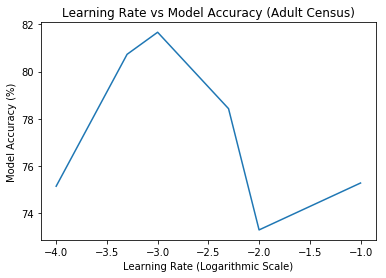

In [10]:
#Test Logisitc Regression over different learning rates

#May need to play around with num_steps and min_error (stopping requirement)

#Initialize
learning_rates = [0.1,0.01,0.005,0.001,0.0005,0.0001]
lr_accuracy = []

for learning_rate in learning_rates:
    
    average_cross_validation_accuracy = cross_validation_LR(Model_Logistic_Regression, x_train, y_train, K = 5, num_steps = 30000, learning_rate = learning_rate, min_error = 1e-2, random_shuffle = False)
    lr_accuracy.append(average_cross_validation_accuracy)

#Plot
plt.plot(np.log10(learning_rates), lr_accuracy)
plt.title("Learning Rate vs Model Accuracy (Adult Census)")
plt.xlabel("Learning Rate (Logarithmic Scale)")
plt.ylabel("Model Accuracy (%)")

Number of Iterations = 24999
Minimum Cost (J) = 0.8343514863124655
Weights of Model:  [-2.92339909 -0.07211184  0.33993992 -0.05698436  0.24948421 -0.77716927
 -1.10330068  0.6512902  -1.22347633 -0.68796455 -0.03226267 -0.61169848
 -0.69035015 -0.24584187 -0.10523301 -0.24955061 -0.53613457 -0.42654666
 -0.42473415 -0.37720933  0.72296527  0.66064881 -1.77703548  1.02764817
 -0.03183203  1.10918323 -0.96767824 -1.16332068  0.03803964  1.5441156
 -0.18642714 -2.51262246 -0.38658856 -0.25659549 -0.44485565 -0.01598909
 -1.04301326  2.09003792 -1.2072377  -0.92553288 -0.9902695  -1.49351171
 -0.07637292  1.30962649 -0.01389596  0.33781664  0.24150156 -0.69170303
  0.66877433 -1.30996783 -0.50939653 -1.62822429 -1.25235311  1.10776834
 -1.96265703 -0.96074206]
Accuracy:  75.15540820555326 %
Error Rate:  24.844591794446746 %
Precision:  70.83333333333334 %
Recall:  2.7891714520098443 % 

Number of Iterations = 24999
Minimum Cost (J) = 1.1972875597729387
Weights of Model:  [-2.90106202  0.0

Number of Iterations = 24999
Minimum Cost (J) = 0.8343514863124655
Weights of Model:  [-2.92339909 -0.07211184  0.33993992 -0.05698436  0.24948421 -0.77716927
 -1.10330068  0.6512902  -1.22347633 -0.68796455 -0.03226267 -0.61169848
 -0.69035015 -0.24584187 -0.10523301 -0.24955061 -0.53613457 -0.42654666
 -0.42473415 -0.37720933  0.72296527  0.66064881 -1.77703548  1.02764817
 -0.03183203  1.10918323 -0.96767824 -1.16332068  0.03803964  1.5441156
 -0.18642714 -2.51262246 -0.38658856 -0.25659549 -0.44485565 -0.01598909
 -1.04301326  2.09003792 -1.2072377  -0.92553288 -0.9902695  -1.49351171
 -0.07637292  1.30962649 -0.01389596  0.33781664  0.24150156 -0.69170303
  0.66877433 -1.30996783 -0.50939653 -1.62822429 -1.25235311  1.10776834
 -1.96265703 -0.96074206]
Accuracy:  75.15540820555326 %
Error Rate:  24.844591794446746 %
Precision:  70.83333333333334 %
Recall:  2.7891714520098443 % 

Number of Iterations = 24999
Minimum Cost (J) = 1.1972875597729387
Weights of Model:  [-2.90106202  0.0

Number of Iterations = 4236
Minimum Cost (J) = 0.4600699460564268
Weights of Model:  [-0.92077701 -0.03763133  0.24846267 -0.03068647  0.08851958 -0.09570219
 -0.87475378  0.24989518 -0.17639589 -0.10678058 -0.00555932 -0.15290033
 -0.19726014 -0.06846791 -0.02899329 -0.06317693 -0.1205144  -0.09596354
 -0.08518364 -0.06206752  0.48179473  0.17150972 -0.91133329  0.40075139
 -0.0087316   0.28077906 -0.46101932 -0.53085844  0.00611802  1.38574707
 -0.05832485 -1.46559794 -0.14840154 -0.10945934 -0.35017203 -0.00369717
 -0.36485465  0.77869388 -0.24503613 -0.28572982 -0.30316933 -0.58846763
 -0.0276824   0.57946418 -0.00365897  0.03125989  0.02780026 -0.16552709
  1.11249172 -0.81364283 -0.18117787 -0.84103375 -0.52088751  0.32347323
 -0.93316386  0.01238685]
Accuracy:  79.94198093659345 %
Error Rate:  20.058019063406547 %
Precision:  61.31650135256989 %
Recall:  55.783429040196886 % 

Number of Iterations = 4072
Minimum Cost (J) = 0.457612486039026
Weights of Model:  [-0.88396584 -0.037

Number of Iterations = 2790
Minimum Cost (J) = 0.4665203945294118
Weights of Model:  [-0.68859557 -0.03955644  0.24238836 -0.03770924  0.05742876 -0.02069933
 -0.79655893  0.21054029 -0.07566499 -0.05973892 -0.00390244 -0.12120059
 -0.15648589 -0.05115671 -0.01790815 -0.0422713  -0.09283204 -0.06864521
 -0.03545668 -0.01098352  0.38825792  0.12470563 -0.72738293  0.30055354
 -0.00607124  0.18340781 -0.3551262  -0.47722511  0.00385437  1.34648757
 -0.0491211  -1.28249674 -0.13208095 -0.09801361 -0.32712506 -0.00224519
 -0.23046006  0.5746907  -0.14566135 -0.21373047 -0.21856161 -0.47630907
 -0.02228957  0.45327078  0.01436225  0.00486563  0.01443108 -0.11383364
  1.13879167 -0.78012393 -0.13807155 -0.71558409 -0.43368758  0.24007991
 -0.87341149  0.18481593]
Accuracy:  79.29962702030667 %
Error Rate:  20.700372979693327 %
Precision:  57.565217391304344 %
Recall:  56.43648763853367 % 

average cross validation model accuracy = 79.35350186489846% 

Number of Iterations = 4236
Minimum Cost

Number of Iterations = 1376
Minimum Cost (J) = 0.44584332055812687
Weights of Model:  [-3.88637345e-01 -2.66112799e-02  1.98156113e-01 -3.83389400e-02
  3.54127756e-02 -7.27721862e-03 -4.90261206e-01  1.15205561e-01
 -1.92179034e-02 -2.09540672e-02 -1.54528613e-03 -6.43938394e-02
 -9.23837959e-02 -2.87238093e-02 -1.26230391e-02 -2.50472880e-02
 -4.71238785e-02 -3.69805905e-02 -2.40962412e-02 -7.58819312e-03
  2.49876350e-01  6.98925888e-02 -4.24614697e-01  1.63189723e-01
 -4.61223792e-03  1.03261202e-01 -2.06669597e-01 -2.72038283e-01
  1.11850924e-03  8.18736902e-01 -2.56120293e-02 -7.76158423e-01
 -7.33098109e-02 -6.13742091e-02 -1.99400277e-01 -4.75351976e-04
 -1.11621468e-01  3.20370080e-01 -7.59458896e-02 -1.18226836e-01
 -1.09671134e-01 -2.80365497e-01 -1.34892792e-02  2.49490604e-01
  7.90936284e-03 -8.25221631e-03  3.80313157e-03 -5.27625730e-02
  7.07102402e-01 -4.59207697e-01 -7.50944399e-02 -4.22114665e-01
 -2.60889389e-01  1.21566444e-01 -5.54484168e-01  1.65846824e-01]
Acc

Text(0, 0.5, 'Model Accuracy (%)')

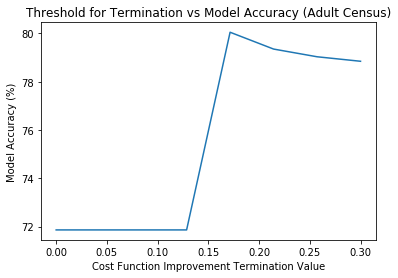

In [11]:
#Threshold of change in value of cost function as termination criteria
#Test Logisitc Regression over different thresholds of cost function improvement

#Initialize
termination_thresholds = np.linspace(0, 0.3, num=8)
termination_accuracy = []

for threshold in termination_thresholds:
    
    average_cross_validation_accuracy = cross_validation_LR(Model_Logistic_Regression, x_train, y_train, K = 5, num_steps = 25000, learning_rate = 0.01, min_error = threshold, random_shuffle = False)
    termination_accuracy.append(average_cross_validation_accuracy)

#Plot
plt.plot(termination_thresholds, termination_accuracy)
plt.title("Threshold for Termination vs Model Accuracy (Adult Census)")
plt.xlabel("Cost Function Improvement Termination Value")
plt.ylabel("Model Accuracy (%)")

Number of Iterations = 24999
Minimum Cost (J) = 0.8343514863124655
Weights of Model:  [-2.92339909 -0.07211184  0.33993992 -0.05698436  0.24948421 -0.77716927
 -1.10330068  0.6512902  -1.22347633 -0.68796455 -0.03226267 -0.61169848
 -0.69035015 -0.24584187 -0.10523301 -0.24955061 -0.53613457 -0.42654666
 -0.42473415 -0.37720933  0.72296527  0.66064881 -1.77703548  1.02764817
 -0.03183203  1.10918323 -0.96767824 -1.16332068  0.03803964  1.5441156
 -0.18642714 -2.51262246 -0.38658856 -0.25659549 -0.44485565 -0.01598909
 -1.04301326  2.09003792 -1.2072377  -0.92553288 -0.9902695  -1.49351171
 -0.07637292  1.30962649 -0.01389596  0.33781664  0.24150156 -0.69170303
  0.66877433 -1.30996783 -0.50939653 -1.62822429 -1.25235311  1.10776834
 -1.96265703 -0.96074206]
Accuracy:  75.15540820555326 %
Error Rate:  24.844591794446746 %
Precision:  70.83333333333334 %
Recall:  2.7891714520098443 % 

Number of Iterations = 24999
Minimum Cost (J) = 1.1972875597729387
Weights of Model:  [-2.90106202  0.0

Number of Iterations = 29999
Minimum Cost (J) = 1.150816431784929
Weights of Model:  [-3.22753339  0.02996773  0.35279461  0.05289239  0.21421043 -0.78917998
 -1.20127795  0.81440693 -1.39868567 -0.83238222 -0.03462492 -0.77722061
 -0.81171894 -0.27566141 -0.0954708  -0.25667255 -0.68203191 -0.48847736
 -0.3086315  -0.2223371   0.62914007  0.78850418 -1.85956223  1.01938008
 -0.03146233  1.08772506 -0.94303605 -1.25855345  0.04399114  1.60690224
 -0.21944984 -2.59716068 -0.51736442 -0.28589837 -0.50332429 -0.01865355
 -1.07719203  2.20105156 -1.27074796 -1.09660004 -1.13079934 -1.63567795
 -0.07489418  1.39193623  0.08045361  0.41006279  0.3108522  -0.81400044
  0.55779527 -1.40823923 -0.51988459 -1.79638853 -1.3737379   1.31292159
 -2.16258018 -1.06495321]
Accuracy:  71.2805636137588 %
Error Rate:  28.719436386241192 %
Precision:  45.50822437789962 %
Recall:  91.98635976129582 % 

average cross validation model accuracy = 73.2822213012847% 

Number of Iterations = 39999
Minimum Cost (

Number of Iterations = 44999
Minimum Cost (J) = 1.0515548232188594
Weights of Model:  [-3.96723123  0.04616345  0.34011497  0.06913758  0.2245964  -1.03326815
 -1.07575708  0.83990741 -1.73292689 -1.13932489 -0.05045804 -1.04742453
 -1.0459509  -0.38000877 -0.12738637 -0.33805192 -0.92856    -0.66580103
 -0.38629295 -0.26400119  0.56277934  1.01101221 -1.73383858  1.00570857
 -0.04419924  1.35334983 -0.93856571 -1.45879359  0.06336114  1.48911453
 -0.28790025 -2.72882522 -0.66491915 -0.3792687  -0.41822451 -0.02630642
 -1.07138093  2.30230192 -1.69035076 -1.3758234  -1.36358264 -1.93785516
 -0.09666824  1.48095663  0.1717531   0.57152684  0.50323164 -1.01680931
  0.23380657 -1.48112509 -0.6481188  -2.0437673  -1.6331845   1.6051579
 -2.63716891 -1.33006232]
Accuracy:  73.74637380853709 %
Error Rate:  26.25362619146291 %
Precision:  47.89615040286482 %
Recall:  91.21909633418585 % 

average cross validation model accuracy = 75.0808122668877% 



Text(0, 0.5, 'Model Accuracy (%)')

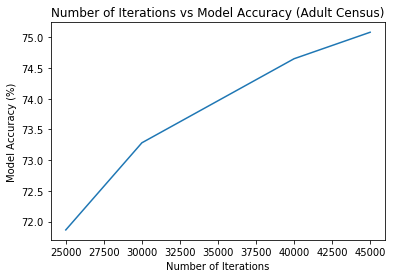

In [11]:
#Plot Accuracy of Train/Validation Set as a Function of Iterations of Gradient Descent
#Limit number of steps

#Initialize
number_of_iterations = [25000, 30000, 40000, 45000]
iter_accuracy = []

for num_steps in number_of_iterations:
    
    average_cross_validation_accuracy = cross_validation_LR(Model_Logistic_Regression, x_train, y_train, K = 5, num_steps = num_steps, learning_rate = 0.01, min_error = 1e-2, random_shuffle = False)
    iter_accuracy.append(average_cross_validation_accuracy)

#Plot
plt.plot(number_of_iterations, iter_accuracy)
plt.title("Number of Iterations vs Model Accuracy (Adult Census)")
plt.xlabel("Number of Iterations")
plt.ylabel("Model Accuracy (%)")

Number of Iterations = 24999
Minimum Cost (J) = 0.8343514863124655
Weights of Model:  [-2.92339909 -0.07211184  0.33993992 -0.05698436  0.24948421 -0.77716927
 -1.10330068  0.6512902  -1.22347633 -0.68796455 -0.03226267 -0.61169848
 -0.69035015 -0.24584187 -0.10523301 -0.24955061 -0.53613457 -0.42654666
 -0.42473415 -0.37720933  0.72296527  0.66064881 -1.77703548  1.02764817
 -0.03183203  1.10918323 -0.96767824 -1.16332068  0.03803964  1.5441156
 -0.18642714 -2.51262246 -0.38658856 -0.25659549 -0.44485565 -0.01598909
 -1.04301326  2.09003792 -1.2072377  -0.92553288 -0.9902695  -1.49351171
 -0.07637292  1.30962649 -0.01389596  0.33781664  0.24150156 -0.69170303
  0.66877433 -1.30996783 -0.50939653 -1.62822429 -1.25235311  1.10776834
 -1.96265703 -0.96074206]
Accuracy:  75.15540820555326 %
Error Rate:  24.844591794446746 %
Precision:  70.83333333333334 %
Recall:  2.7891714520098443 % 

Number of Iterations = 24999
Minimum Cost (J) = 1.1972875597729387
Weights of Model:  [-2.90106202  0.0

Number of Iterations = 24999
Minimum Cost (J) = 1.2390585021393243
Weights of Model:  [-2.89252836  0.02045475  0.37325225  0.04447948  0.15428793 -0.6658369
 -1.2176691   0.74792337 -1.18056487 -0.70344885 -0.02721993 -0.64921025
 -0.68599881 -0.22908288 -0.09431121 -0.21557851 -0.60990103 -0.39147359
 -0.32505761 -0.1991466   0.5774678   0.68714046 -1.8517963   1.01725522
 -0.02647433  1.02802975 -0.92439046 -1.11646811  0.04087134  1.62646696
 -0.19799011 -2.53530748 -0.45143712 -0.25866384 -0.49755134 -0.01745462
 -0.99098675  2.03612379 -1.10321598 -0.98460258 -1.03112788 -1.56500057
 -0.06376503  1.35883096  0.05087812  0.3404229   0.27656404 -0.70164342
  0.62236044 -1.36618444 -0.47192806 -1.67060618 -1.23009361  1.22392349
 -1.99825068 -0.89427768]
Accuracy:  71.0108220124338 %
Error Rate:  28.9891779875662 %
Precision:  45.85635359116022 %
Recall:  92.3076923076923 % 

average cross validation model accuracy = 73.44692608795762% 

Accuracy:  79.55330416762607 %
Error Rate:  2

Number of Iterations = 24999
Minimum Cost (J) = 0.8570650506898807
Weights of Model:  [-2.7996829  -0.08190335  0.36800145 -0.06210533  0.02026799 -0.47330811
 -1.2956527   0.89568141 -1.14143192 -0.77982871 -0.02541087 -0.64952085
 -0.6343078  -0.20783082 -0.10358331 -0.2224337  -0.6518333  -0.44398699
 -0.29146889 -0.15028974  0.52145653  0.62181137 -1.58469788  0.90247206
 -0.0213762   0.99650853 -0.8806019  -1.03732229  0.04176806  1.69143206
 -0.1752681  -2.47055359 -0.48994887 -0.35979018 -0.70033973 -0.0176358
 -1.0225506   2.04069144 -1.07861609 -0.93110033 -1.01190603 -1.49779213
 -0.04680325  1.20768292  0.10396167  0.35282581  0.42875842 -0.62685921
  0.48138369 -1.30284977 -0.43385094 -1.68448384 -1.22230975  1.36242771
 -1.94894801 -0.85073489]
Accuracy:  74.80314960629921 %
Error Rate:  25.196850393700785 %
Precision:  70.58823529411765 %
Recall:  1.951219512195122 % 

Number of Iterations = 24999
Minimum Cost (J) = 1.2492421775505882
Weights of Model:  [-2.86644129  0.01

Accuracy:  78.5240464344942 %
Error Rate:  21.475953565505804 %
Precision:  58.55855855855856 %
Recall:  77.61194029850746 % 

Accuracy:  78.27529021558873 %
Error Rate:  21.724709784411278 %
Precision:  53.31858407079646 %
Recall:  82.53424657534246 % 

Accuracy:  78.27529021558873 %
Error Rate:  21.724709784411278 %
Precision:  53.546910755148744 %
Recall:  79.86348122866895 % 

Accuracy:  76.53399668325042 %
Error Rate:  23.466003316749585 %
Precision:  51.7162471395881 %
Recall:  75.83892617449665 % 

Accuracy:  77.86069651741293 %
Error Rate:  22.139303482587064 %
Precision:  51.74825174825175 %
Recall:  78.72340425531915 % 

average cross validation model accuracy = 77.893864013267% 



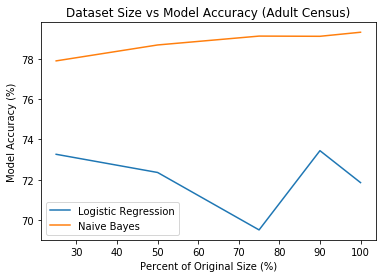

In [113]:
#Adjust size of datasets and compare accuracy
#Compare 5 different sizes

Model_Naive_Bayes = MultinomialNaiveBayes()
Model_Logistic_Regression = LogisticRegression(intercept = True)

length = int(len(x_train))
length90 = int(length*0.9)
length75 = int(length*0.75)
length50 = int(length*0.5)
length25 = int(length*0.25)
length10 = int(length*0.1)

x_train_reduced = [x_train[:length90,:], x_train[:length75,:], x_train[:length50,:], x_train[:length25,:], x_train[:length10,:]] 
y_train_reduced = [y_train[:length90], y_train[:length75], y_train[:length50], y_train[:length25], y_train[:length10]]
percentage_of_original = [100, 90, 75, 50, 25]
lr_accuracy = []
nb_accuracy = []

lr_average_cross_validation_accuracy = cross_validation_LR(Model_Logistic_Regression, x_train, y_train, K = 5, num_steps = 25000, learning_rate = 0.01, min_error = 1e-2, random_shuffle = False)
nb_average_cross_validation_accuracy = cross_validation_NB(Model_Naive_Bayes, x_train_nb, y_train_nb, K = 5, random_shuffle = False)
lr_accuracy.append(lr_average_cross_validation_accuracy)
nb_accuracy.append(nb_average_cross_validation_accuracy)


lr_average_cross_validation_accuracy = cross_validation_LR(Model_Logistic_Regression, x_train[:length90,:], y_train[:length90], K = 5, num_steps = 25000, learning_rate = 0.01, min_error = 1e-2, random_shuffle = False)
nb_average_cross_validation_accuracy = cross_validation_NB(Model_Naive_Bayes, x_train_nb[:length90,:], y_train_nb[:length90], K = 5, random_shuffle = False)
lr_accuracy.append(lr_average_cross_validation_accuracy)
nb_accuracy.append(nb_average_cross_validation_accuracy)

lr_average_cross_validation_accuracy = cross_validation_LR(Model_Logistic_Regression, x_train[:length75,:], y_train[:length75], K = 5, num_steps = 25000, learning_rate = 0.01, min_error = 1e-2, random_shuffle = False)
nb_average_cross_validation_accuracy = cross_validation_NB(Model_Naive_Bayes, x_train_nb[:length75,:], y_train_nb[:length75], K = 5, random_shuffle = False)
lr_accuracy.append(lr_average_cross_validation_accuracy)
nb_accuracy.append(nb_average_cross_validation_accuracy)

lr_average_cross_validation_accuracy = cross_validation_LR(Model_Logistic_Regression, x_train[:length50,:], y_train[:length50], K = 5, num_steps = 25000, learning_rate = 0.01, min_error = 1e-2, random_shuffle = False)
nb_average_cross_validation_accuracy = cross_validation_NB(Model_Naive_Bayes, x_train_nb[:length50,:], y_train_nb[:length50], K = 5, random_shuffle = False)
lr_accuracy.append(lr_average_cross_validation_accuracy)
nb_accuracy.append(nb_average_cross_validation_accuracy)

lr_average_cross_validation_accuracy = cross_validation_LR(Model_Logistic_Regression, x_train[:length25,:], y_train[:length25], K = 5, num_steps = 25000, learning_rate = 0.01, min_error = 1e-2, random_shuffle = False)
nb_average_cross_validation_accuracy = cross_validation_NB(Model_Naive_Bayes, x_train_nb[:length25,:], y_train_nb[:length25], K = 5, random_shuffle = False)
lr_accuracy.append(lr_average_cross_validation_accuracy)
nb_accuracy.append(nb_average_cross_validation_accuracy)

#lr_average_cross_validation_accuracy = cross_validation_LR(Model_Logistic_Regression, x_train[:length10,:], y_train[:length10], K = 5, num_steps = 5000, learning_rate = 0.01, min_error = 1e-2, random_shuffle = False)
#nb_average_cross_validation_accuracy = cross_validation_NB(Model_Naive_Bayes, x_train[:length10,:], y_train[:length10], K = 5, random_shuffle = False)
#lr_accuracy.append(lr_average_cross_validation_accuracy)
#nb_accuracy.append(nb_average_cross_validation_accuracy)
        

#Plot
plt.plot(percentage_of_original, lr_accuracy)
plt.plot(percentage_of_original, nb_accuracy)
plt.title("Dataset Size vs Model Accuracy (Adult Census)")
plt.xlabel("Percent of Original Size (%)")
plt.ylabel("Model Accuracy (%)")
plt.legend(["Logistic Regression", "Naive Bayes"])


Number of Iterations = 24999
Minimum Cost (J) = 1.2221187508248308
Weights of Model:  [-2.90263513  0.02215425  0.37272425  0.04272019  0.20858712 -0.69744088
 -1.20437582  0.72457404 -1.21894687 -0.68796144 -0.02707127 -0.62172113
 -0.71565002 -0.2308756  -0.10548872 -0.23453933 -0.55278989 -0.42421355
 -0.34261036 -0.27445878  0.6598299   0.67322963 -1.81697868  0.99896421
 -0.03189354  1.04418645 -0.92762571 -1.16232399  0.03614446  1.61217249
 -0.18746959 -2.49641405 -0.43294362 -0.27180083 -0.46967735 -0.01270545
 -1.03999447  2.06647484 -1.16161391 -0.93682881 -0.98300256 -1.47961002
 -0.06922321  1.27230698  0.04032219  0.35077914  0.24676882 -0.7266313
  0.64778568 -1.3261981  -0.47628458 -1.65019342 -1.27200371  1.17425899
 -1.95206997 -0.95056517]
Accuracy:  70.55702917771883 %
Error Rate:  29.44297082228117 %
Precision:  45.811688311688314 %
Recall:  92.95125164690383 % 

Number of Iterations = 24999
Minimum Cost (J) = 1.2511529267313979
Weights of Model:  [-2.88718339  0.02

Accuracy:  77.65251989389921 %
Error Rate:  22.347480106100797 %
Precision:  53.82194244604317 %
Recall:  78.85375494071147 % 

Accuracy:  77.58620689655173 %
Error Rate:  22.413793103448278 %
Precision:  53.72197309417041 %
Recall:  78.91963109354414 % 

Accuracy:  77.55305039787798 %
Error Rate:  22.446949602122015 %
Precision:  53.67713004484305 %
Recall:  78.85375494071147 % 

Accuracy:  77.78514588859416 %
Error Rate:  22.214854111405835 %
Precision:  54.01987353206865 %
Recall:  78.78787878787878 % 

Accuracy:  77.56962864721486 %
Error Rate:  22.430371352785148 %
Precision:  53.697893321380555 %
Recall:  78.91963109354414 % 

Accuracy:  77.53647214854111 %
Error Rate:  22.463527851458885 %
Precision:  53.662921348314605 %
Recall:  78.65612648221344 % 

Accuracy:  77.42042440318302 %
Error Rate:  22.579575596816976 %
Precision:  53.48837209302325 %
Recall:  78.78787878787878 % 

Accuracy:  77.68567639257294 %
Error Rate:  22.314323607427056 %
Precision:  53.877366997294864 %
Reca

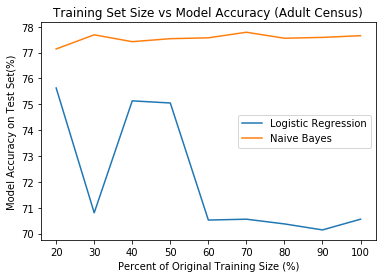

In [120]:
#The Accuracy of the Test set based on different sizes of the training set
#Need to choose optimum hyper-parameters on Logistic Regression

length = int(len(x_train))
length90 = int(length*0.90)
length80 = int(length*0.80)
length70 = int(length*0.70)
length60 = int(length*0.60)
length50 = int(length*0.50)
length40 = int(length*0.40)
length30 = int(length*0.30)
length20 = int(length*0.20)

x_train_reduced = [x_train, x_train[:length90,:], x_train[:length80,:], x_train[:length70,:],x_train[:length60,:], x_train[:length50,:], x_train[:length40,:],x_train[:length30,:], x_train[:length20,:]] 
y_train_reduced = [y_train, y_train[:length90], y_train[:length80], y_train[:length70], y_train[:length60], y_train[:length50], y_train[:length40], y_train[:length30], y_train[:length20]]
percentage_of_original = [100, 90, 80, 70, 60, 50, 40, 30, 20]
LR_accuracy = []
NB_accuracy = []


model_LR = LogisticRegression(intercept = True)
for i in range(len(x_train_reduced)):
    w = model_LR.fit(x_train_reduced[i], y_train_reduced[i], num_steps = 25000, learning_rate = 0.01, min_error = 1e-2)            
    
    y_pred = model_LR.predict(x_test, w)
    
    accuracy = model_LR.evaluate_acc(y_test, y_pred)
    LR_accuracy.append(accuracy)


model_NB = MultinomialNaiveBayes()
for i in range(len(x_train_reduced)):
    likelihoods, neg_prior,pos_prior = model_NB.fit(x_train_reduced[i], y_train_reduced[i])
    
    y_pred = model_NB.predict(x_test,likelihoods, neg_prior,pos_prior)
    
    accuracy = model_NB.evaluate_acc(y_test,y_pred)
    NB_accuracy.append(accuracy)
    

#Plot
plt.plot(percentage_of_original, LR_accuracy)
plt.plot(percentage_of_original, NB_accuracy)
plt.title("Training Set Size vs Model Accuracy (Adult Census)")
plt.xlabel("Percent of Original Training Size (%)")
plt.ylabel("Model Accuracy on Test Set(%)")
plt.legend(["Logistic Regression", "Naive Bayes"])
